In [30]:
import numpy as np
import pandas as pd

# stats
from scipy import stats

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Histgram

(array([ 1.,  1., 11.,  6., 10., 21., 22., 13.,  8.,  7.]),
 array([-3.10320499, -2.59283308, -2.08246116, -1.57208924, -1.06171733,
        -0.55134541, -0.04097349,  0.46939843,  0.97977034,  1.49014226,
         2.00051418]),
 <a list of 10 Patch objects>)

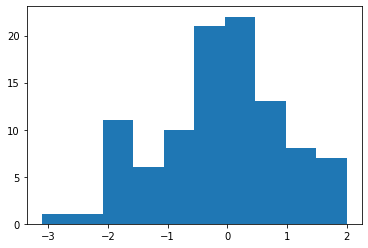

In [4]:
dataset1 = np.random.randn(100)
plt.hist(dataset1)

(array([ 1.,  2.,  6., 13., 18., 16., 14.,  5.,  4.,  1.]),
 array([-3.34952999, -2.69782497, -2.04611995, -1.39441493, -0.74270991,
        -0.09100489,  0.56070013,  1.21240515,  1.86411017,  2.51581519,
         3.16752021]),
 <a list of 10 Patch objects>)

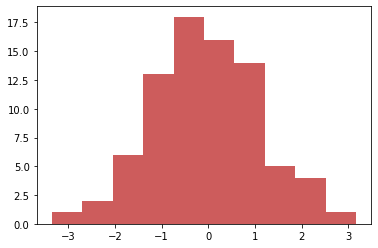

In [6]:
dataset2 = np.random.randn(80)
plt.hist(dataset2, color='indianred')

(array([0.03836091, 0.        , 0.        , 0.07672183, 0.07672183,
        0.15344365, 0.19180457, 0.30688731, 0.2685264 , 0.42197005,
        0.15344365, 0.46033096, 0.30688731, 0.23016548, 0.11508274,
        0.07672183, 0.11508274, 0.03836091, 0.        , 0.03836091]),
 array([-3.34952999, -3.02367748, -2.69782497, -2.37197246, -2.04611995,
        -1.72026744, -1.39441493, -1.06856242, -0.74270991, -0.4168574 ,
        -0.09100489,  0.23484762,  0.56070013,  0.88655264,  1.21240515,
         1.53825766,  1.86411017,  2.18996268,  2.51581519,  2.8416677 ,
         3.16752021]),
 <a list of 20 Patch objects>)

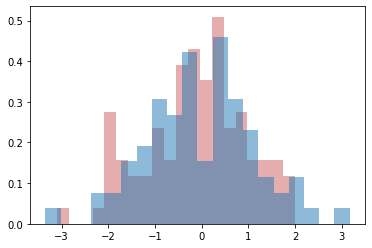

In [8]:
plt.hist(dataset1, density=True, color='indianred', alpha=.5, bins=20)
plt.hist(dataset2, density=True, alpha=.5, bins=20)

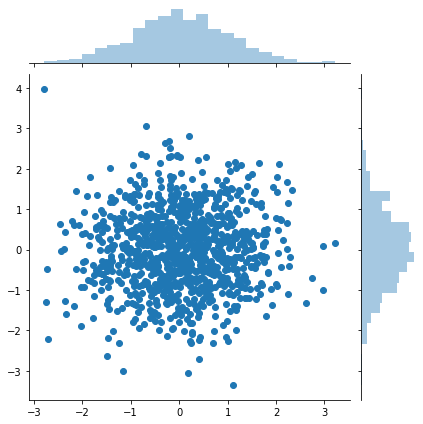

In [10]:
data1 = np.random.randn(1000)
data2 = np.random.randn(1000)

sns.jointplot(data1, data2)

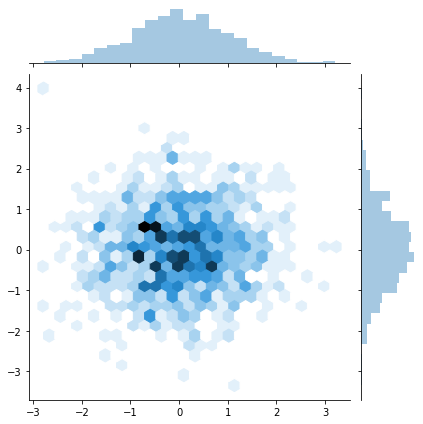

In [11]:
sns.jointplot(data1, data2, kind='hex')

# Kernel Density Estimation plot

(0, 1)

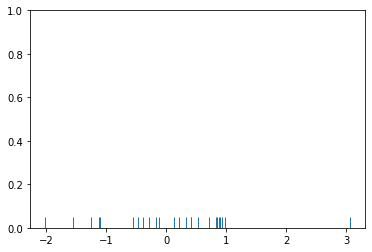

In [14]:
dataset = np.random.randn(25)
sns.rugplot(dataset)
plt.ylim(0, 1)

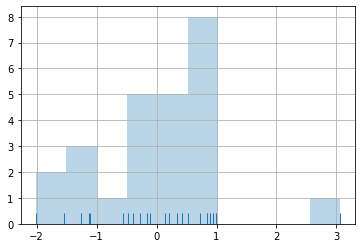

In [18]:
plt.figure()
plt.grid()
plt.hist(dataset, alpha=.3)
sns.rugplot(dataset)

(0, 1)

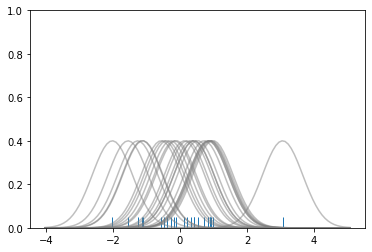

In [21]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((5*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0,1)
    

Text(0.5, 0.98, 'Sum of the basis functions')

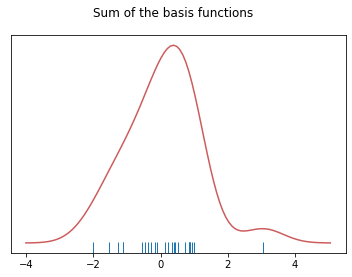

In [22]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle("Sum of the basis functions")

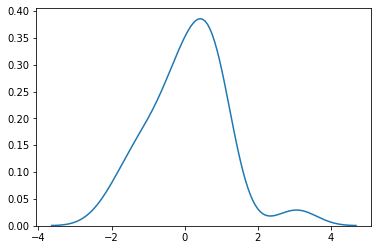

In [23]:
sns.kdeplot(dataset)

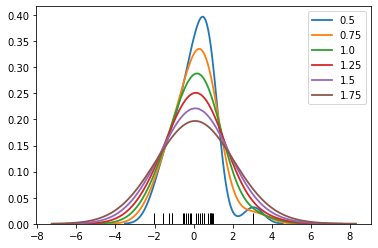

In [24]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

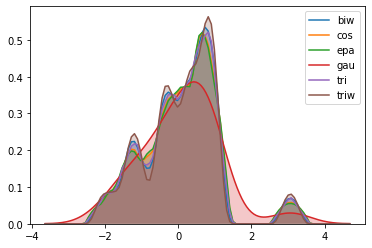

In [26]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True)

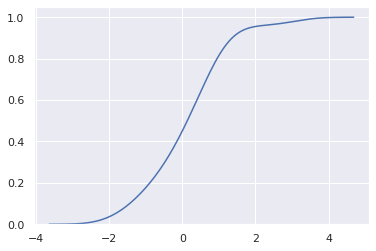

In [29]:
sns.kdeplot(dataset, cumulative=True)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


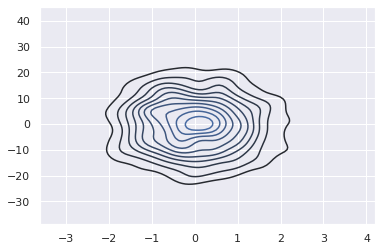

In [32]:
mean = [0,0]

cov = [[1,0], [0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns=['X', 'Y'])

sns.kdeplot(dframe)

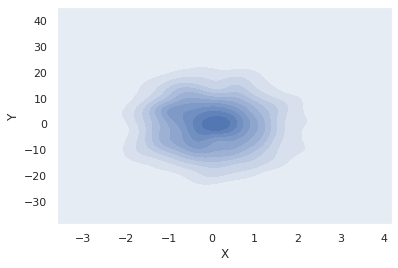

In [33]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

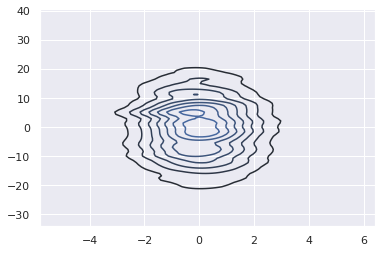

In [34]:
sns.kdeplot(dframe, bw=1)

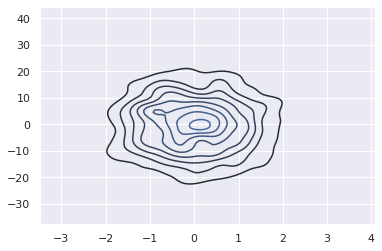

In [35]:
sns.kdeplot(dframe, bw='silverman')

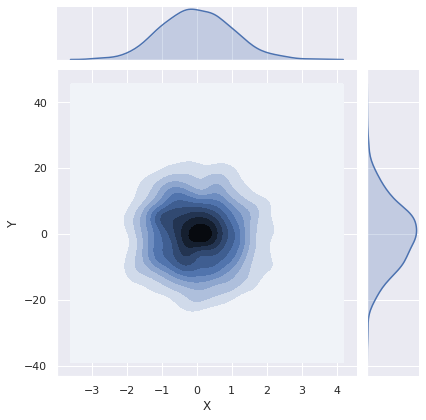

In [36]:
sns.jointplot('X', 'Y', dframe, kind='kde')

# Combining plot styles

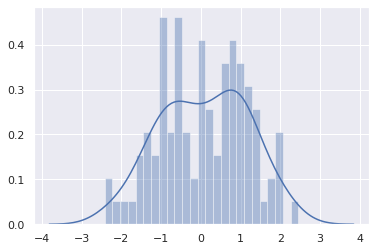

In [37]:
dataset = np.random.randn(100)

sns.distplot(dataset, bins=25)

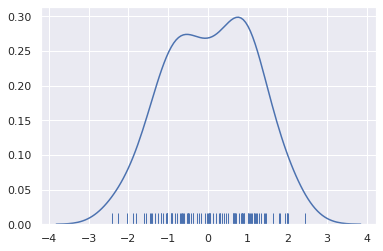

In [38]:
sns.distplot(dataset, bins=25, rug=True, hist=False)

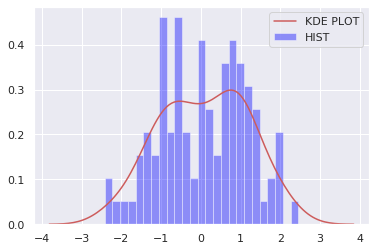

In [40]:
sns.distplot(dataset, bins=25,
           kde_kws={'color': 'indianred', 'label': 'KDE PLOT'},
           hist_kws={'color': 'blue', 'label': 'HIST'})

In [41]:
ser1 = pd.Series(dataset, name='My_data')
ser1

0    -1.265202
1    -1.551840
2    -0.422575
3     0.038081
4     1.239883
        ...   
95    1.221651
96   -0.766117
97   -0.903347
98   -1.183575
99    1.186170
Name: My_data, Length: 100, dtype: float64

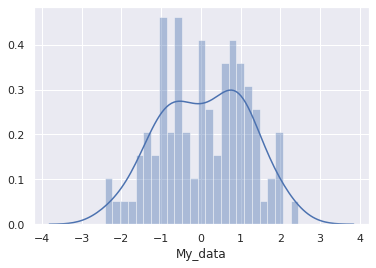

In [42]:
sns.distplot(ser1, bins=25)

# Box and Violin plots

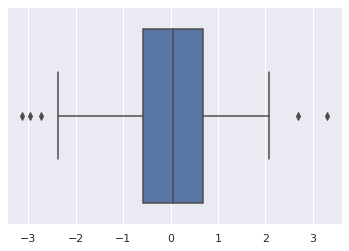

In [59]:
sns.set()
data1 = np.random.randn(100)
data2 = np.random.randn(100)

sns.boxplot([data1, data2])

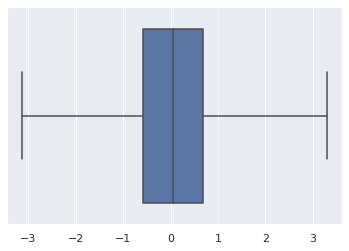

In [60]:
sns.boxplot([data1, data2], whis=np.inf)

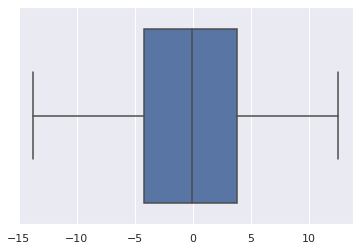

In [61]:
#Normal Dist
data1 = stats.norm(0, 5).rvs(100)

# Two gamma dist. Concatenated together
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                       -1*stats.gamma(5).rvs(50)])

# Box plot both data1 and data2
sns.boxplot([data1, data2], whis=np.inf)

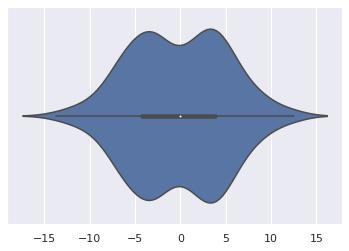

In [62]:
sns.violinplot([data1, data2])

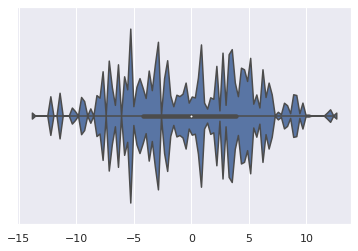

In [64]:
sns.violinplot([data1, data2], bw=0.01)

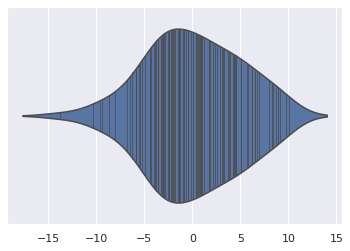

In [65]:
sns.violinplot(data1, inner='stick')

# Regression Plot

In [66]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


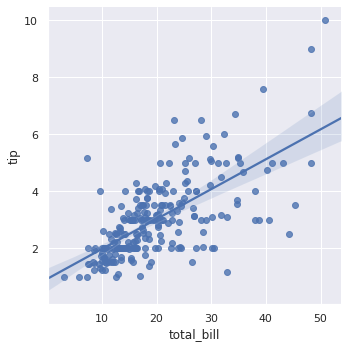

In [67]:
sns.lmplot('total_bill', 'tip', tips)

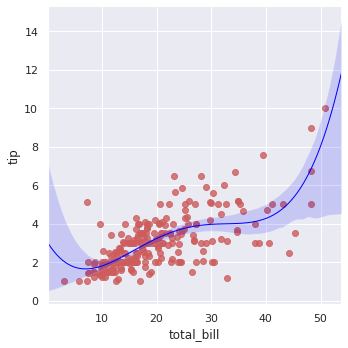

In [69]:
sns.lmplot('total_bill', 'tip', tips, order=4,
          scatter_kws={'marker': 'o', 'color': 'indianred'},
          line_kws={'linewidth':1, 'color':'blue'})

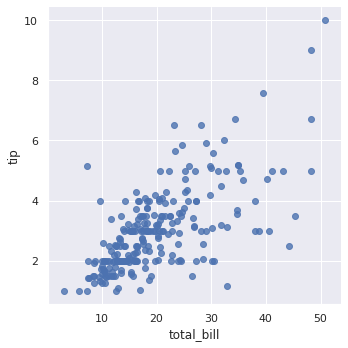

In [70]:
sns.lmplot('total_bill', 'tip', tips, fit_reg=False)

In [71]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
tips['tip_pect'] = 100*(tips['tip'] / tips['total_bill'])

In [91]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


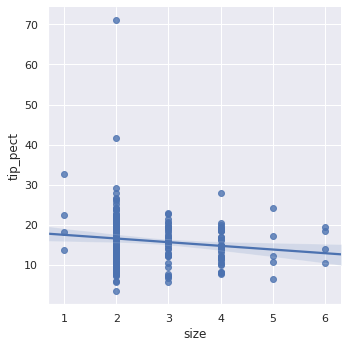

In [92]:
sns.lmplot('size', 'tip_pect', tips)

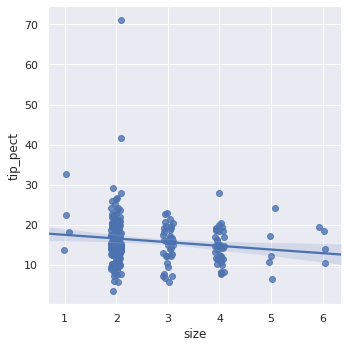

In [93]:
sns.lmplot('size', 'tip_pect', tips, x_jitter=.1)

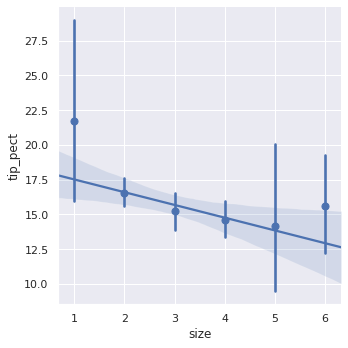

In [94]:
sns.lmplot('size', 'tip_pect', tips, x_estimator=np.mean)

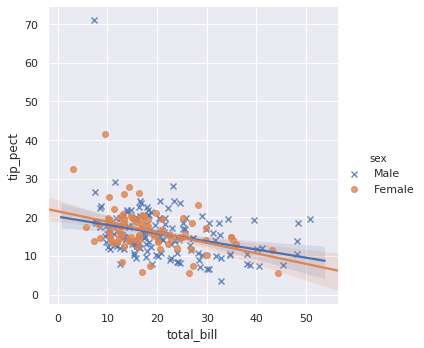

In [95]:
sns.lmplot('total_bill', 'tip_pect', tips, hue='sex', markers=['x', 'o'])

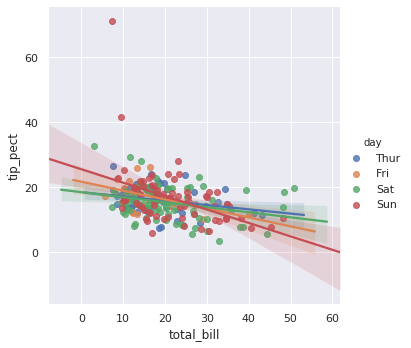

In [96]:
sns.lmplot('total_bill', 'tip_pect', tips, hue='day')

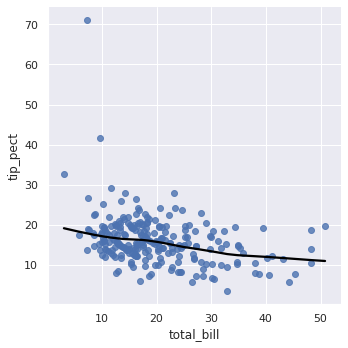

In [97]:
sns.lmplot('total_bill', 'tip_pect', tips, lowess=True, line_kws={'color': 'black'})

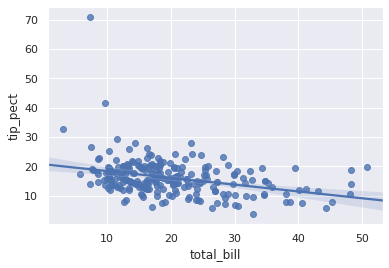

In [98]:
sns.regplot('total_bill', 'tip_pect', tips)

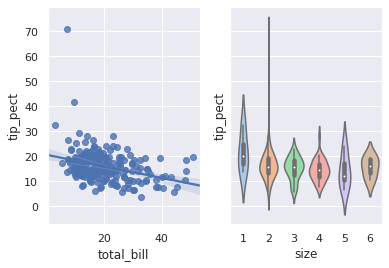

In [115]:
fig, (axis1, axis2) = plt.subplots(1, 2, sharey=True)

sns.regplot('total_bill', 'tip_pect', tips, ax=axis1)
sns.violinplot(y='tip_pect', x='size', data=tips, palette="pastel", ax=axis2)

# Heatmaps and Clustered matrices

In [117]:
flight_dframe = sns.load_dataset('flights')
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [118]:
flight_dframe = flight_dframe.pivot('month', 'year', 'passengers')

In [119]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


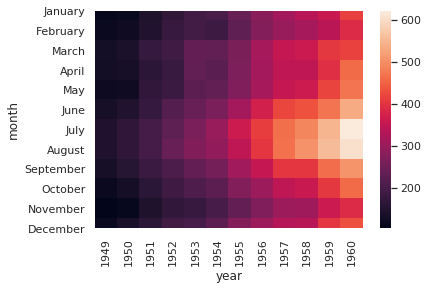

In [120]:
sns.heatmap(flight_dframe)

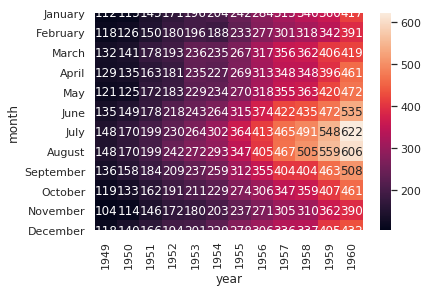

In [121]:
sns.heatmap(flight_dframe, annot=True, fmt='d')

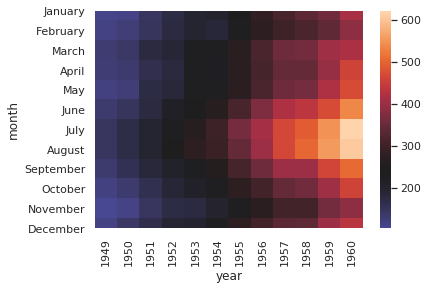

In [124]:
sns.heatmap(flight_dframe, center=flight_dframe.loc['January', 1955])

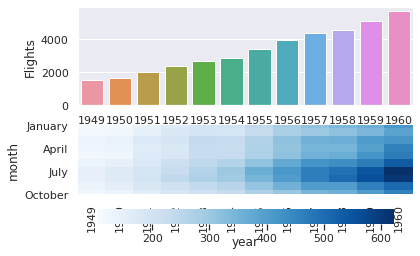

In [128]:
f, (axis1, axis2) = plt.subplots(2, 1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)

sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation': 'horizontal'})

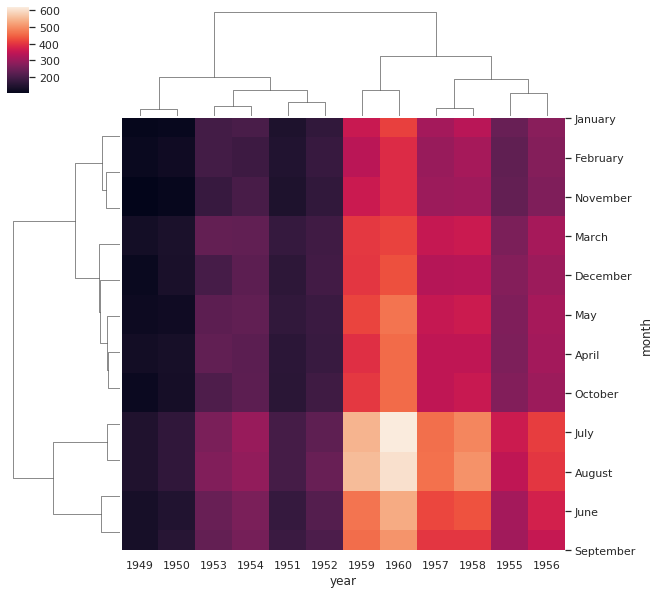

In [129]:
sns.clustermap(flight_dframe)

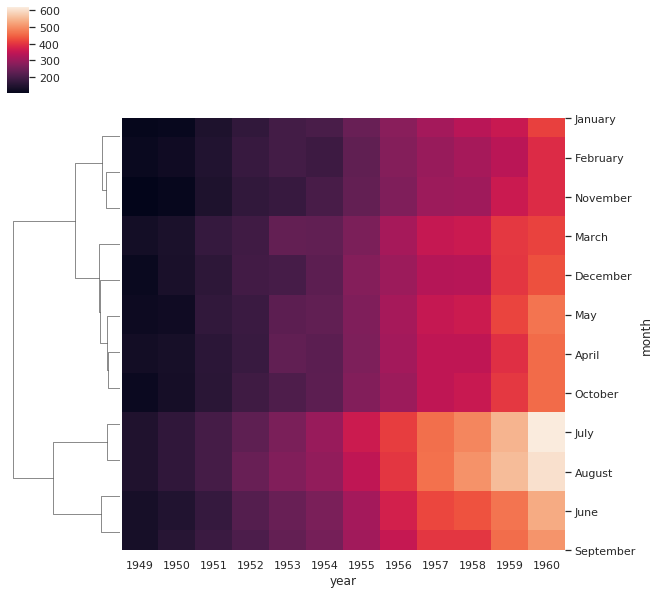

In [130]:
sns.clustermap(flight_dframe, col_cluster=False)

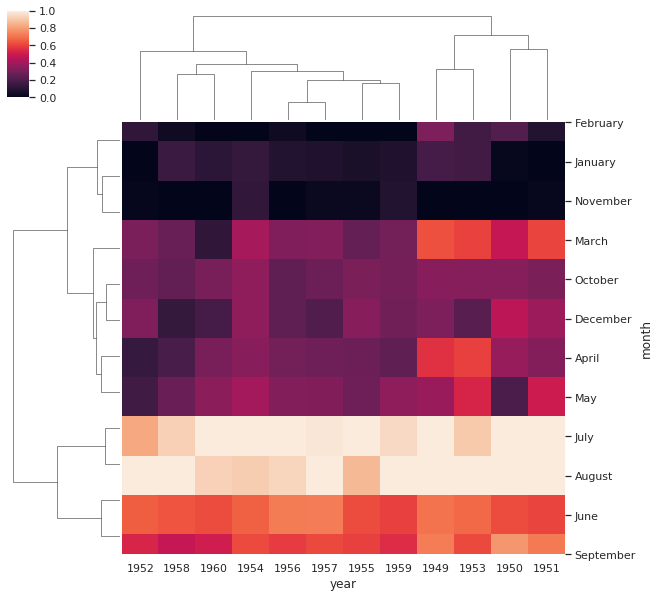

In [131]:
sns.clustermap(flight_dframe, standard_scale=1)

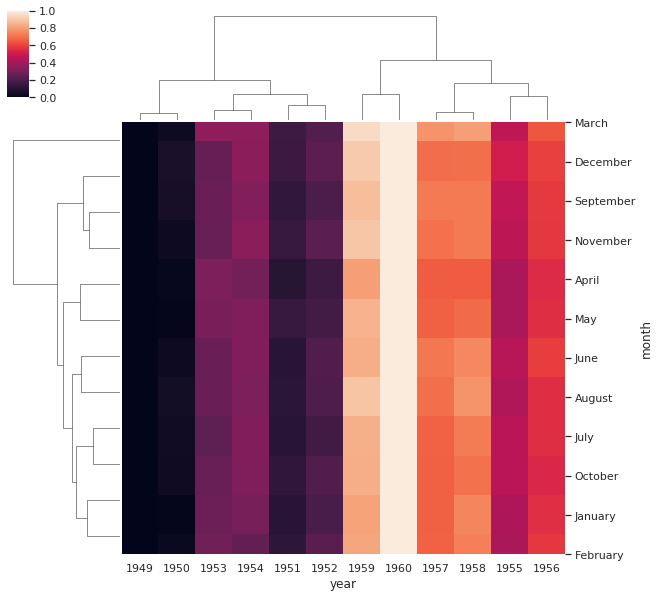

In [132]:
sns.clustermap(flight_dframe, standard_scale=0)

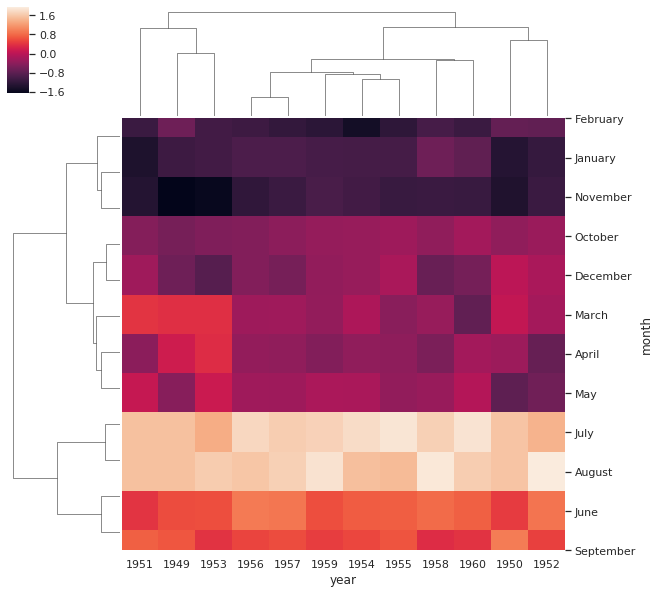

In [133]:
sns.clustermap(flight_dframe, z_score=1)